<a href="https://colab.research.google.com/github/JakeOh/202208_itw_java134_lab_python/blob/main/py25_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens 데이터 셋

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
* movies.dat: "MovieID::Title::Genres"을 컬럼으로 하는 데이터 셋. 영화 정보.
* ratings.dat: "UserID::MovieID::Rating::Timestamp"을 컬럼으로 하는 데이터 셋. 영화 별점.
* users.dat: "UserID::Gender::Age::Occupation::Zip-code"을 컬럼으로 하는 데이터 셋. 사용자 정보.



* movies.dat 파일을 읽고 DataFrame 생성 - `pd.read_csv()`
* DataFrame 탐색 - `head, tail, info, ...`
* 장르가 'Animation'인 영화는 몇 개? - genres(장르들) 컬럼의 문자열이 'Animation'을 포함.
* 장르가 로맨틱 코미디인 영화는 몇 개? - genres 컬럼의 문자열이 'Comedy'와 'Romance'를 포함.
* 어떤 장르의 영화가 가장 많은가? - genres의 문자열을 '|'를 구분자로 분리(split)
* 연도별 영화 수 - title(제목) 컬럼에 영화 개봉 연도가 포함.


In [2]:
# movies.dat 파일이 저장된 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [3]:
# movies 데이터프레임의 컬럼 이름
movies_colnames = ['movie_id', 'title', 'genres']

In [5]:
movies = pd.read_csv(movies_file, sep='::', names=movies_colnames, engine='python')

In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


## 장르 분석 - 애니메이션 찾기

In [13]:
animations = movies[movies.genres.str.contains('Animation')]  # boolean indexing

In [14]:
animations.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [15]:
len(animations)

105

In [16]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


## 장르 분석 - 로맨틱 코미디 찾기

In [17]:
romantic_comedies = movies[movies.genres.str.contains('Romance') &
                           movies.genres.str.contains('Comedy')]

In [18]:
romantic_comedies.head()

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance


In [19]:
len(romantic_comedies)

204

## 장르 분석 - 가장 빈번한 장르

In [27]:
genres = []  # 개별 영화의 장르를 저장할 리스트
for s in movies.genres:
    genres.extend(s.split(sep='|'))  # 1차원 리스트를 만들기 위해서.

In [28]:
print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [29]:
genre_counts = pd.value_counts(genres)  # values의 내림차순 정렬.
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [31]:
genre_counts.index[0]  # 가장 빈도수가 많은 영화 장르

'Drama'

빈도수 상위 7개의 장르를 시각화

In [36]:
genre_top7 = genre_counts.head(n=7)  # iloc[:7]
genre_top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

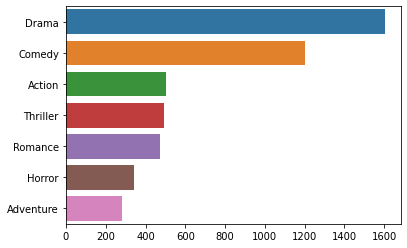

In [37]:
sns.barplot(y=genre_top7.index, x=genre_top7.values)
plt.show()

장르 빈도수 시각화

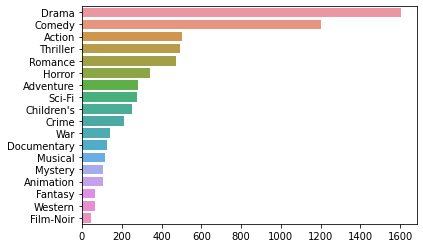

In [38]:
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.show()

## 연도별 영화 개수 분석

In [39]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
# 데이터프레임에 파생변수(새로운 컬럼)을 추가
movies['year'] = movies.title.str[-5:-1].astype('int')

In [45]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [47]:
year_counts = movies.year.value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

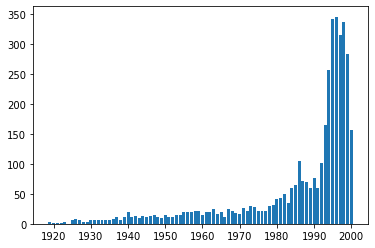

In [51]:
# sns.barplot(x=year_counts.index, y=year_counts.values)
plt.bar(x=year_counts.index, height=year_counts.values)
plt.show()

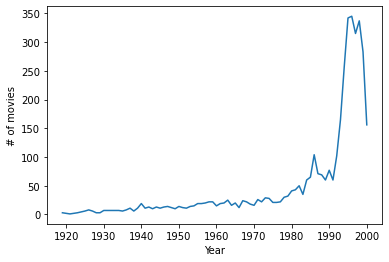

In [53]:
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('Year')
plt.ylabel('# of movies')
plt.show()